# Scraping and Analyzing Dynamic Content using Selenium

### Importing Necessary Libraries

In [2]:
import json
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up the Selenium WebDriver

In [3]:
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode for background processing
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

### Opening the Amazon makeup category page

In [4]:
url = 'https://www.amazon.com/s?k=makeup' 
driver.get(url)

### Using WebDriverWait to wait for the product listings to load

In [5]:
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//div[contains(@data-component-type, "s-search-result")]'))
    )
except Exception as e:
    print("Error loading page:", e)
    driver.quit()

### Extracting Dynamic Elements

In [6]:
products = driver.find_elements(By.XPATH, '//div[contains(@data-component-type, "s-search-result")]')

data = []

for product in products:
    # Extracting product title
    try:
        title_element = product.find_element(By.XPATH, './/h2/a/span').text
        # Formatting title to include brand and product name using pipe separator
        title_parts = title_element.split(' ', 1) 
        if len(title_parts) > 1:
            formatted_title = f"{title_parts[0]} | {title_parts[1]}"
        else:
            formatted_title = title_element  
        print("Found title:", formatted_title) 
    except Exception as e:
        formatted_title = "N/A"

    # Extracting price
    try:
        price_whole = product.find_element(By.XPATH, './/span[@class="a-price-whole"]').text
        price_fraction = product.find_element(By.XPATH, './/span[@class="a-price-fraction"]').text
        price = f"${price_whole}.{price_fraction}"  
        print("Found price:", price)  
    except Exception as e:
        price = "N/A"

    # Extracting ratings
    try:
        rating_element = product.find_element(By.XPATH, './/span[contains(@class, "a-icon-alt")]')
        rating_text = rating_element.get_attribute("innerText") 
        rating = rating_text.split()[0] 
        print("Found rating:", rating)  
    except Exception as e:
        rating = "No rating"

    # Append the extracted data to the list
    data.append({
        'Title': formatted_title,
        'Price': price,
        'Rating': rating,
    })

Found title: essence | | Lash Princess False Lash Effect Mascara | Volumizing & Lengthening | Cruelty Free & Paraben Free
Found rating: 4.3
Found title: L'Oreal | Paris Makeup True Match Lumi Glotion, Natural Glow Enhancer, Illuminator Highlighter, Bronzing Drops For a Sun-Kissed Glow, 903 Medium
Found price: $13.98
Found rating: 4.6
Found title: Maybelline | Lash Sensational Sky High Washable Mascara Makeup, Volumizing, Lengthening, Defining, Curling, Multiplying, Buildable Formula, Blackest Black, 1 Count
Found price: $9.98
Found rating: 4.5
Found title: e.l.f. | Power Grip Primer, Gel-Based & Hydrating Face Primer For Smoothing Skin & Gripping Makeup, Moisturizes & Primes, 0.811 Fl Oz (24 ml.)
Found price: $9.98
Found rating: 4.6
Found title: L'Oreal | Paris Makeup Telescopic Original Lengthening Mascara, Blackest Black, 0.27 Fl Oz (1 Count)
Found price: $9.73
Found rating: 4.5
Found title: IT | Cosmetics Your Skin But Better CC+ Cream - Color Correcting Cream, Full-Coverage Foundat

### Creating DataFrame and saving it in CSV format

In [7]:
df = pd.DataFrame(data)
df.to_csv('amazon_makeup_products.csv', index=False)

### Closing the WebDriver

In [8]:
driver.quit()
print("Data scraped from Amazon and saved in CSV format.")

Data scraped from Amazon and saved in CSV format.


### Checking if the DataFrame is empty and print its contents

In [10]:
if df.empty:
    print("DataFrame is empty. Please check the scraping logic.")
else:
    print("Scraped data preview:\n", df.head()) 

Scraped data preview:
                                                Title   Price Rating
0  essence | | Lash Princess False Lash Effect Ma...     N/A    4.3
1  L'Oreal | Paris Makeup True Match Lumi Glotion...  $13.98    4.6
2  Maybelline | Lash Sensational Sky High Washabl...   $9.98    4.5
3  e.l.f. | Power Grip Primer, Gel-Based & Hydrat...   $9.98    4.6
4  L'Oreal | Paris Makeup Telescopic Original Len...   $9.73    4.5


### Loading the Scraped Dataset

In [63]:
df = pd.read_csv('amazon_makeup_products.csv')  

In [64]:
df.head()

,Title,Price,Rating
0,essence | | Lash Princess False Lash Effect Ma...,NaN,4.3
1,L'Oreal | Paris Makeup True Match Lumi Glotion...,$13.98,4.6
2,Maybelline | Lash Sensational Sky High Washabl...,$9.98,4.5
3,"e.l.f. | Power Grip Primer, Gel-Based & Hydrat...",$9.98,4.6
4,L'Oreal | Paris Makeup Telescopic Original Len...,$9.73,4.5


### Checking for Missing Values

In [65]:
df.isnull().sum()

Title     0
Price     1
Rating    0
dtype: int64

### Dropping rows where price is missing

In [66]:
df = df.dropna(subset=['Price'])

### Checking for Duplicate Values

In [67]:
df.duplicated().sum()

0

### Cleaning the Price column

In [78]:
# Removing dollar signs
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)  
# Keeping only numbers and decimal points
df['Price'] = df['Price'].str.replace(r'[^0-9.]', '', regex=True) 
# Converting to numeric, coercing errors
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

### Checking the Data Types

In [80]:
print(df.dtypes)

Title      object
Price     float64
Rating    float64
dtype: object


### Summary statistics

In [84]:
df.describe()

,Price,Rating
count,47.000000,47.000000
mean,10.927021,4.478723
std,9.124134,0.139776
min,3.000000,4.200000
25%,6.895000,4.400000
50%,8.970000,4.500000
75%,9.980000,4.500000
max,47.000000,4.800000


### Calculating Average Price and Rating

In [126]:
average_price = df['Price'].mean()
average_rating = df['Rating'].mean()
print(f"\nAverage Price: ${average_price:.2f}")
print(f"Average Rating: {average_rating:.2f} stars")


Average Price: $10.93
Average Rating: 4.48 stars


## Price Distribution

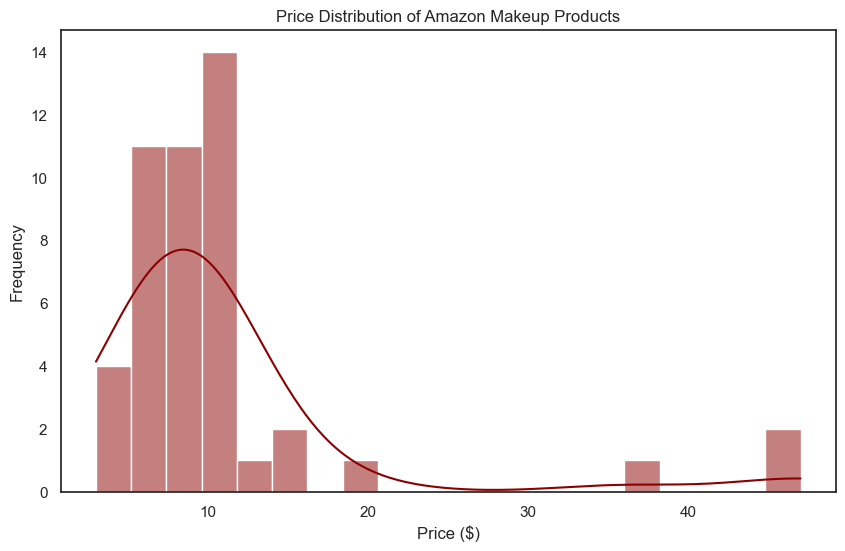

In [125]:
# Setting up a plain style for visualization
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='darkred')
plt.title('Price Distribution of Amazon Makeup Products')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

## Rating Distribution

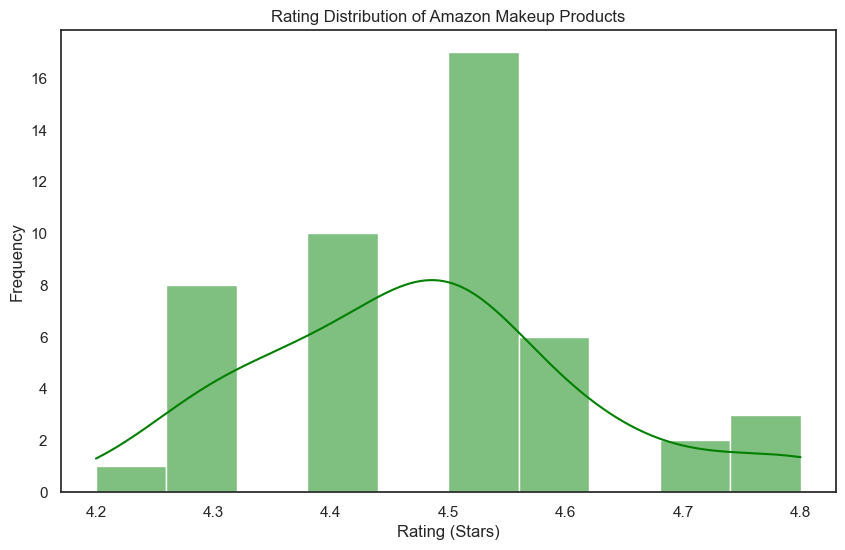

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='green')
plt.title('Rating Distribution of Amazon Makeup Products')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.show()

## Price vs. Rating 

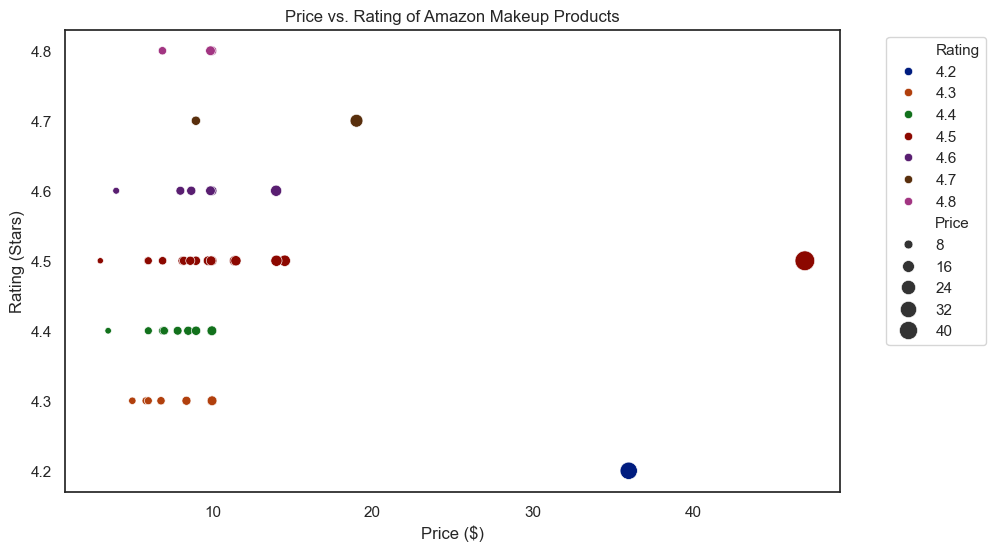

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Rating', palette='dark', size='Price', sizes=(20, 200), edgecolor='w')
plt.title('Price vs. Rating of Amazon Makeup Products')
plt.xlabel('Price ($)')
plt.ylabel('Rating (Stars)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()